# ES 335: Machine Learning Pre-requisite Test Submission
_Name:_ Hrriday Viraj Ruparel

_Roll No.:_ 22110099

_Batch & Discipline:_ B.Tech 2022 & Computer Science and Engineering

_Email Id:_ hrriday.ruparel@iitgn.ac.in

#### _Q1:_ How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

In order to perform a matrix multiplication using Naive Matrix Multiplication Method between a (n,k) and (k,m) matrix<br />
$n \times m \times k$ number of multiplication operations have to be performed<br />
$n \times m \times (k-1)$ number of addition operations have to be performed<br />

_Explanation:_<br />
Matrix Multiplication between a $A_{n,k}$ and $B_{k,m}$ matrix yields a $C_{n,m}$ matrix. If $(i,j)$ pair denote the coordinate in $C_{n,m}$ matrix, where $1 \leq i \leq n$ and $1 \leq j \leq m$, then<br />
$$C_{i,j} = \sum_{p=1}^{k} A_{i,p} \times B_{p,j} $$

From the above equation, we can infer that for each entry in $C_{n,m}$, there are:<br />
$k-1$ addition operations and $k$ multiplication operations being performed
Hence, for the entire matrix, there would be $n \times m \times (k-1)$ addition and $n \times m \times k$ multiplication operations.

#### _Q2:_ Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [16]:
import numpy as np
import random
import time

n = 30
k = 20
m = 15
# A1 -> n x k Matrix
A1 = [[random.randint(0, 10) for _ in range(k)] for _ in range(n)]

# B1 -> k x m Matrix
B1 = [[random.randint(0, 10) for _ in range(m)] for _ in range(k)]

A2 = np.array(A1)
B2 = np.array(B1)

# C1 -> n x m matrix
C1 = [[0 for _ in range(m)] for _ in range(n)]

In [17]:
t1 = time.time()
for i in range(n):
    for j in range(m):
     s = 0
     for p in range(k):
          s += A1[i][p] * B1[p][j]
     C1[i][j] = s
time.sleep(1)
t2 = time.time()

In [18]:
t3 = time.time()
C2 = np.matmul(A2,B2)
time.sleep(1)
t4 = time.time()

In [19]:
print('C1 (List of Lists method):\n',C1,'\nC2 (NumPy method):\n',C2)
print(f'\nTime for List of Lists method: {(t2-t1-1)*10**6}ms\nTime for NumPy method: {(t4-t3-1)*10**6}ms\n')

C1 (List of Lists method):
 [[519, 602, 530, 538, 574, 657, 620, 510, 659, 567, 549, 531, 477, 626, 420], [440, 610, 422, 443, 415, 560, 614, 478, 566, 512, 445, 487, 477, 480, 360], [403, 541, 367, 405, 369, 499, 483, 392, 525, 486, 394, 438, 405, 447, 360], [514, 754, 583, 597, 570, 802, 709, 545, 758, 667, 620, 584, 614, 692, 494], [278, 427, 403, 369, 329, 481, 489, 364, 484, 350, 440, 364, 352, 455, 353], [397, 470, 492, 485, 463, 567, 609, 447, 488, 493, 576, 501, 430, 571, 369], [408, 567, 452, 440, 443, 554, 552, 451, 491, 483, 490, 442, 409, 443, 375], [425, 500, 416, 443, 382, 570, 662, 488, 527, 481, 449, 423, 362, 489, 344], [430, 562, 485, 480, 440, 573, 571, 422, 482, 574, 500, 480, 446, 545, 334], [498, 652, 472, 475, 492, 647, 643, 557, 596, 596, 487, 486, 447, 528, 415], [581, 683, 505, 468, 476, 676, 741, 557, 670, 558, 587, 616, 556, 601, 476], [295, 496, 417, 484, 437, 545, 549, 407, 585, 491, 468, 407, 451, 505, 357], [442, 597, 465, 496, 451, 662, 691, 572, 629, 5

From the results, the NumPy method of Matrix Multiplication is much faster than List of Lists method for large matrices. This is because one of NumPy library's puprose is to optimize operations on arrays and matrices. 

#### _Q3:_ Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

The time complexity of this method of finding the median of the array is $O(n^2)$ as at least:
$$
Number\;of\;passes=
\begin{cases}
\frac{n+1}{2} & \quad \text{when n is odd}\\ 
\frac{n+2}{2} & \quad \text{when n is even}
\end{cases}
\forall \, n \geq 3
$$
above number of passes have to be made to obtain the median value. Assuming that the array to be traversed is shortening as highest elements are being found (just like Bubble Sort in increasing order):<br>
$$1st \; pass \rightarrow n$$
$$2nd \; pass\rightarrow n-1$$
$$3rd \; pass \rightarrow n-2$$
and so on...<br>
Total steps:<br>
$$\sum_{k=1}^{\frac{n+1}{2}}(n-k+1) = \frac{(n+1)(n+1)}{2}-\frac{(n+1)(n+3)}{8} = \frac{3n^2+4n+1}{8}, \, n\in odd$$
$$\sum_{k=1}^{\frac{n+2}{2}}(n-k+1) = \frac{(n+1)(n+2)}{2}-\frac{(n+2)(n+4)}{8} = \frac{3n^2+6n}{8}, \, n\in even$$
Hence, the total time complexity of this naive method of finding the median is $O(n^2)$<br><br>
A slightly better method to find the median would be to sort the array using a sorting technique that takes $O(n\log_2n)$ like Merge Sort and then find the median in:<br>
$O(n)$, if the length of the array is not given or,<br>
$O(1)$, if the length of the array is given.<br>
Hence, the total time complexity would be $O(n\log_2n)$

In [20]:
def naiveMedian(a,n):
    l = 1
    if n%2 == 0:
        while l<=(n//2+1):
            max = -np.infty
            for i in range(n-l+1):
                if a[i]>max:
                    max = a[i]
                    index = i
            a[index],a[-l] = a[-l],a[index]
            l+=1
        return (a[n//2-1]+a[n//2])/2
    else:
        while l<=(n+1)//2:
            max = -np.infty
            for i in range(n-l+1):
                if a[i]>max:
                    max = a[i]
                    index = i
            a[index],a[-l] = a[-l],a[index]
            l+=1
        return a[(n-1)//2]

def merge(l1,l2,n1,n2):
	i = 0
	j = 0
	l3 = []
	while i < n1 and j < n2:
		if l1[i] <= l2[j]:
			l3.append(l1[i])
			i += 1
		elif l1[i] > l2[j]:
			l3.append(l2[j])
			j += 1
	while i < n1:
		l3.append(l1[i])
		i += 1
	while j < n2:
		l3.append(l2[j])
		j += 1
	return l3

def mergesort(arr,low,high):
	if low == high:	
		return [arr[low]]
	mid = (low+high)//2
	l1 = mergesort(arr,low,mid)
	l2 = mergesort(arr,mid+1,high)
	l3 = merge(l1,l2,mid-low+1,high-mid)
	return l3

In [33]:
n = 10000 # Number of elements
arr = [random.randint(-n//3,n//3) for i in range(n)]
arr1 = np.array(arr)
print(arr)

[1623, 1047, 1496, 987, -1050, -2423, -2073, 985, 1610, -1418, -517, -2331, -1317, -2207, 3192, -1952, -1607, 2220, -239, 2076, 2341, -2106, 2268, -1990, -901, 555, 2859, -1590, 1563, 3074, 557, -139, -360, 3237, -447, 1152, 2746, 2277, 1338, -1857, 2338, -2346, 1983, 440, -2019, 2655, 149, 15, -610, 2840, 2635, -2881, -1872, -2321, 3069, 628, -2237, -1993, -1519, -1984, 2853, -674, -1096, 899, 651, 138, 1709, -2466, 1997, 1225, -1280, -3007, 1185, -908, -966, -1387, 2222, -323, 2489, 1493, 2525, 170, -3166, -372, -622, 1630, 543, -1502, -971, 2839, 2019, -1980, 2111, -2707, 2098, -1152, -2510, 1575, 1749, 3040, -2665, 1158, -1533, -1562, -302, -2026, -436, -2188, -1244, -103, -1684, 2795, -1523, 1159, -1089, -821, 325, 1086, 3204, 2714, 2973, -3314, -629, -3098, -2050, -2483, -1770, 1968, -2727, -3086, 1863, -1949, 3156, 82, 2747, -2162, 2978, -1926, 782, 3031, 747, -838, 1998, 2441, 124, 724, -1888, 15, -694, -1309, 2733, -1513, 2647, -2032, -156, -203, -886, 2378, 2791, -2347, 1191,

In [34]:
t1 = time.time()
m1 = naiveMedian(arr,n)
time.sleep(1)
t2 = time.time()

In [35]:
t3 = time.time()
l = mergesort(arr,0,n-1)
if n%2==0:
    m2 = (l[(n//2)-1]+l[n//2])/2
else:
    m2 = l[(n-1)//2]
time.sleep(1)
t4 = time.time()
print(l)

[-3333, -3332, -3332, -3331, -3330, -3330, -3330, -3329, -3328, -3328, -3327, -3327, -3326, -3326, -3326, -3324, -3323, -3323, -3323, -3322, -3320, -3320, -3319, -3318, -3318, -3317, -3317, -3317, -3316, -3316, -3316, -3316, -3315, -3315, -3314, -3314, -3312, -3312, -3312, -3311, -3311, -3311, -3310, -3310, -3310, -3309, -3309, -3308, -3308, -3308, -3307, -3307, -3306, -3306, -3305, -3304, -3303, -3303, -3302, -3300, -3299, -3299, -3299, -3298, -3298, -3297, -3296, -3296, -3296, -3296, -3296, -3295, -3294, -3293, -3290, -3290, -3290, -3289, -3288, -3287, -3287, -3286, -3285, -3285, -3285, -3284, -3282, -3282, -3281, -3281, -3280, -3279, -3279, -3279, -3279, -3279, -3279, -3278, -3278, -3277, -3276, -3276, -3276, -3276, -3275, -3275, -3275, -3275, -3273, -3273, -3272, -3271, -3270, -3270, -3269, -3268, -3267, -3267, -3267, -3267, -3266, -3265, -3265, -3264, -3264, -3264, -3263, -3262, -3260, -3260, -3259, -3259, -3256, -3255, -3255, -3253, -3253, -3253, -3252, -3252, -3252, -3251, -3250

In [36]:
t5 = time.time()
m3 = np.median(arr1)
time.sleep(1)
t6 = time.time()

In [37]:
print(f'Medians:\n\t1) Naive Method: {m1}\n\t2) Merge Sort Method: {m2}\n\t3) NumPy Method: {m3}')
print(f'Time taken:\n\t1) Naive Method: {(t2-t1-1)*10**6}ms\n\t2) Merge Sort Method: {(t4-t3-1)*10**6}ms\n\t3) NumPy Method: {(t6-t5-1)*10**6}ms')

Medians:
	1) Naive Method: 21.0
	2) Merge Sort Method: 21.0
	3) NumPy Method: 21.0
Time taken:
	1) Naive Method: 1309734.582901001ms
	2) Merge Sort Method: 20586.252212524414ms
	3) NumPy Method: 1685.6193542480469ms


Time consumed for very large arrays: NumPy Method < Merge Sort Method < Naive Method

#### _Q4:_ What is the gradient of the following function with respect to x and y?
$$ x^2y + y^3sin(x) $$

The gradient of the function with respect to x is: $$2xy + y^3cos(x)$$
The gradient of the function with respect to y is: $$x^2 + 3y^2sin(x)$$

#### _Q5:_ Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [38]:
import jax
x1 = random.randint(-10,10)*random.random()
y1 = random.randint(-10,10)*random.random()
x2 = random.randint(-10,10)*random.random()
y2 = random.randint(-10,10)*random.random()
x3 = random.randint(-10,10)*random.random()
y3 = random.randint(-10,10)*random.random()
print(f'x = {x1}, y = {y1}')
print(f'x = {x2}, y = {y2}')
print(f'x = {x3}, y = {y3}')

def f(x,y):
    return x**2*y + y**3*jax.numpy.sin(x)

f_grad_x = jax.grad(f)
f_grad_y = jax.grad(f,1)

x = -0.7939505837367341, y = -8.031756796450358
x = 0.06251857483364798, y = -1.8367818079709721
x = 3.573426407030859, y = -2.7058057260100528


In [39]:
print(f"Gradient with respect to x:\n\t1) JAX:\n\t\ta){f_grad_x(x1,y1)}\n\t\tb){f_grad_x(x2,y2)}\n\t\tc){f_grad_x(x3,y3)}\n\t2) Analytical:\n\t\ta){2*x1*y1 + y1**3*np.cos(x1)}\n\t\ta){2*x2*y2 + y2**3*np.cos(x2)}\n\t\tc){2*x3*y3 + y3**3*np.cos(x3)}")
print(f"Gradient with respect to y:\n\t1) JAX:\n\t\ta){f_grad_y(x1,y1)}\n\t\tb){f_grad_y(x2,y2)}\n\t\tc){f_grad_y(x3,y3)}\n\t2) Analytical:\n\t\ta){x1**2 + 3*y1**2*np.sin(x1)}\n\t\ta){x2**2 + 3*y2**2*np.sin(x2)}\n\t\tc){x3**2 + 3*y3**2*np.sin(x3)}")

Gradient with respect to x:
	1) JAX:
		a)-350.4669189453125
		b)-6.41443395614624
		c)-1.3463382720947266
	2) Analytical:
		a)-350.4669317392179
		a)-6.4144340431543885
		c)-1.3463355491297975
Gradient with respect to y:
	1) JAX:
		a)-137.3794708251953
		b)0.6362658739089966
		c)3.576565742492676
	2) Analytical:
		a)-137.3794780130893
		a)0.6362658395042726
		c)3.576566978049133


#### _Q6:_ Use sympy to confirm that you obtain the same gradient analytically.

In [40]:
from sympy.vector import CoordSys3D, Del
import sympy
C = CoordSys3D('C')
delop = Del()
gradient_field = delop(C.x**2*C.y + C.y**3*sympy.sin(C.x))
gradient_field.doit()

(2*C.x*C.y + C.y**3*cos(C.x))*C.i + (C.x**2 + 3*C.y**2*sin(C.x))*C.j

Analytical Solution:<br>
$$\nabla f(x,y) = \frac {\partial f}{\partial x}\hat i + \frac {\partial f}{\partial y}\hat j = (2xy+y^3cos(x))\hat i + (x^2+3y^2sin(x))\hat j$$
Hence, solutions confirmed

#### _Q7:_ Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

- 2022
    - Branch 1
        - Roll Number: 1, Name: N, Marks:
            - Maths: 100, English: 70 …
    - Branch 2
- 2023
    - Branch 1
    - Branch 2
- 2024
    - Branch 1
    - Branch 2
- 2025
    - Branch 1
    - Branch 2

In [44]:
import pprint
master_dict = {'1. 2022':{'1. Branch 1':{'Roll Number':1,'Name':'N','Marks':{'1. Maths':100,'2. English':70}},'2. Branch 2':dict()},'2. 2023':{'1. Branch 1':dict(),'2. Branch 2':dict()},'3. 2024':{'1. Branch 1':dict(),'2. Branch 2':dict()},'4. 2025':{'1. Branch 1':dict(),'2. Branch 2':dict()}}
pprint.pprint(master_dict)

{'1. 2022': {'1. Branch 1': {'Marks': {'1. Maths': 100, '2. English': 70},
                             'Name': 'N',
                             'Roll Number': 1},
             '2. Branch 2': {}},
 '2. 2023': {'1. Branch 1': {}, '2. Branch 2': {}},
 '3. 2024': {'1. Branch 1': {}, '2. Branch 2': {}},
 '4. 2025': {'1. Branch 1': {}, '2. Branch 2': {}}}


#### _Q8:_ Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [51]:
class student():
    def __init__(self):
        self.name = None # String
        self.roll_number = None # Int
        self.marks = None # Dict
        return None

class branch():
    def __init__(self):
        self.list_of_students = []
        return None

class year():
    def __init__(self):
        self.list_of_branches = []
        return None

s1_y22_b1 = student()
s1_y22_b1.name = 'N'
s1_y22_b1.roll_number = 1
s1_y22_b1.marks = {'Maths':100,'English':70}

b1_y22 = branch()
b2_y22 = branch()
b1_y22.list_of_students.append(s1_y22_b1)

y22 = year()
y22.list_of_branches.append(b1_y22)
y22.list_of_branches.append(b2_y22)

y23 = year()
b1_y23 = branch()
b2_y23 = branch()
y23.list_of_branches.append(b1_y23)
y23.list_of_branches.append(b2_y23)

y24 = year()
b1_y24 = branch()
b2_y24 = branch()
y24.list_of_branches.append(b1_y24)
y24.list_of_branches.append(b2_y24)

y25 = year()
b1_y25 = branch()
b2_y25 = branch()
y25.list_of_branches.append(b1_y25)
y25.list_of_branches.append(b2_y25)

list_of_years = [y22,y23,y24,y25]

print(list_of_years[0].list_of_branches[0].list_of_students[0].marks)

{'Maths': 100, 'English': 70}


#### _Q9:_ Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $y=x$
2. $y=x^2$
3. $y = \frac{x^3}{100}$
4. $y=sin(x)$
5. $y = \frac{sin(x)}{x}$
6. $y=log(x)$
7. $y=e^x$

In [52]:
import matplotlib.pyplot as plt
x = np.arange(start=0.5,step=0.5,stop=100.5)

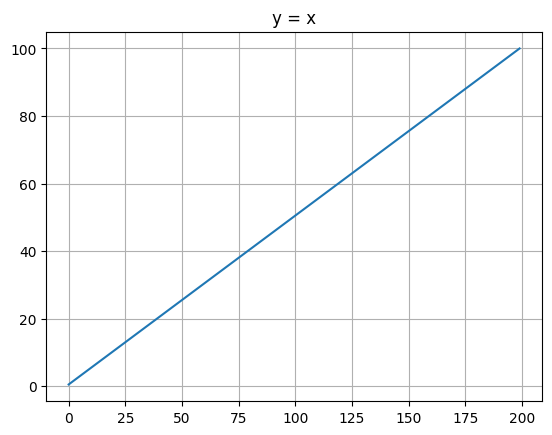

In [53]:
y = x
plt.plot(y)
plt.grid()
plt.title('y = x')
plt.show()

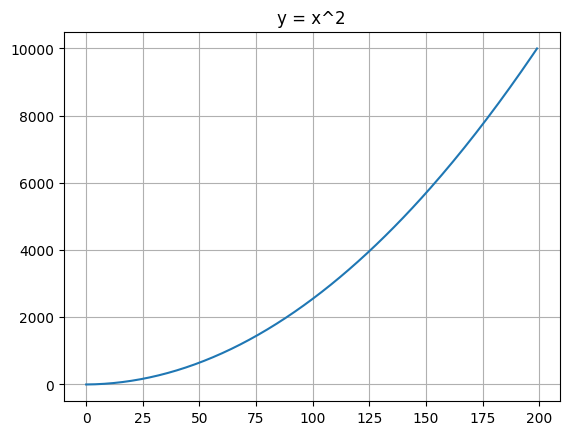

In [54]:
y = x**2
plt.plot(y)
plt.grid()
plt.title('y = x^2')
plt.show()

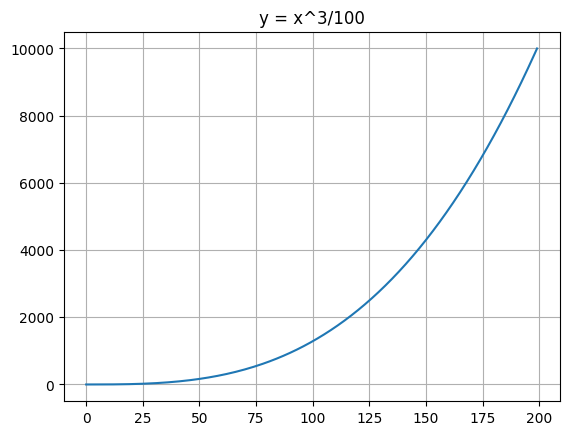

In [55]:
y = x**3/100
plt.plot(y)
plt.grid()
plt.title('y = x^3/100')
plt.show()

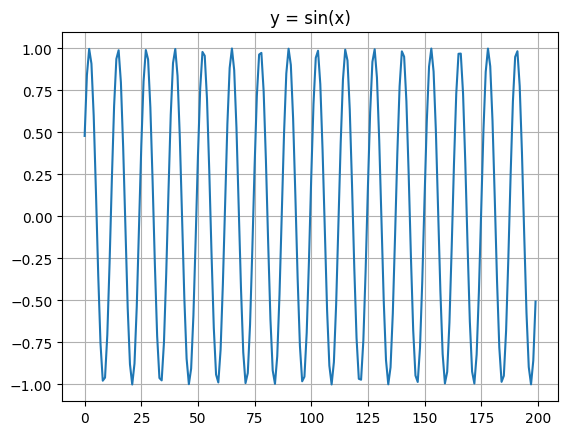

In [56]:
y = np.sin(x)
plt.plot(y)
plt.grid()
plt.title('y = sin(x)')
plt.show()

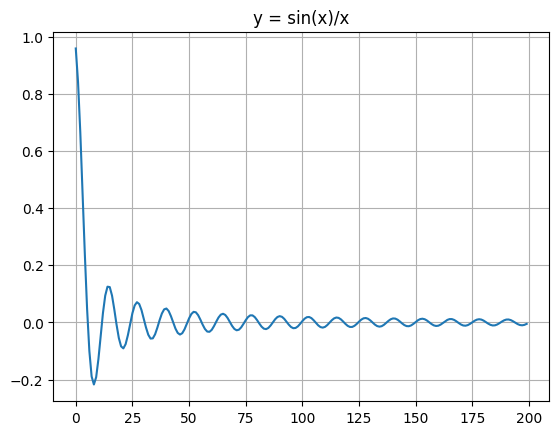

In [57]:
y = np.sin(x)/x
plt.plot(y)
plt.grid()
plt.title('y = sin(x)/x')
plt.show()

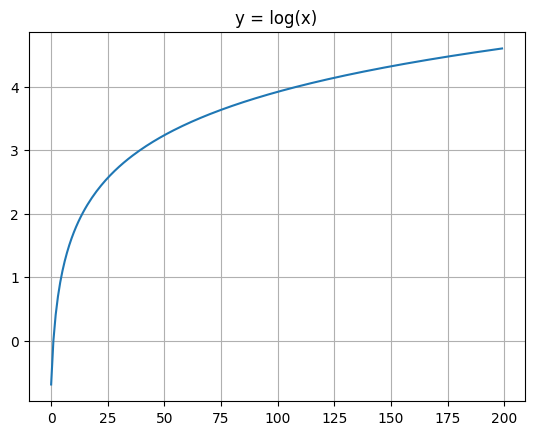

In [58]:
y = np.log(x)
plt.plot(y)
plt.grid()
plt.title('y = log(x)')
plt.show()

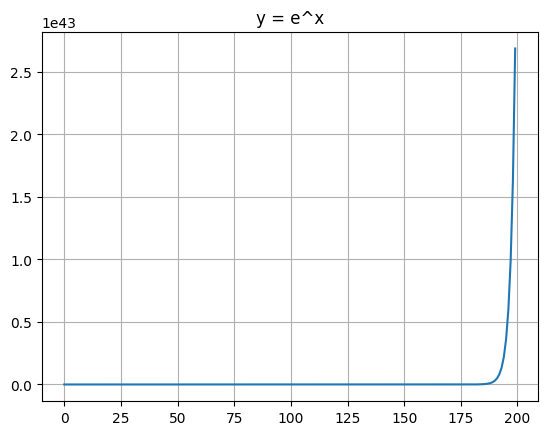

In [59]:
y = np.e**x
plt.plot(y)
plt.grid()
plt.title('y = e^x')
plt.show()

#### _Q10:_ Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.



In [60]:
import pandas as pd
mat = np.random.uniform(low=1,high=2,size=(20,5))
data = pd.DataFrame({'a':mat[:,0],'b':mat[:,1],'c':mat[:,2],'d':mat[:,3],'e':mat[:,4]})
display(data)

,a,b,c,d,e
0,1.224459,1.474057,1.342764,1.838244,1.406053
1,1.925408,1.004553,1.999914,1.996990,1.733185
2,1.880335,1.148860,1.571817,1.568214,1.544136
3,1.759785,1.111358,1.953941,1.801654,1.197603
4,1.599726,1.096374,1.336858,1.517945,1.730975
5,1.850901,1.369612,1.259941,1.711147,1.457637
6,1.756199,1.853132,1.965766,1.913395,1.675489
7,1.892541,1.009637,1.900206,1.213608,1.082175
8,1.737752,1.659431,1.974192,1.448208,1.318105
9,1.440783,1.577247,1.203626,1.422378,1.425085


In [61]:
print(f'Standard Deviations of columns:\n{data.std()}')
print(f'Column with highest Standard Deviation: {['a','b','c','d','e'][np.argmax(data.std())]}')

Standard Deviations of columns:
a    0.302262
b    0.305056
c    0.318477
d    0.232946
e    0.259066
dtype: float64
Column with highest Standard Deviation: c


In [62]:
print(f'Means of rows:\n{data.mean(axis=1)}')
print(f'Row with lowest Mean: {range(0,20)[np.argmin(data.mean(axis=1))]}')

Means of rows:
0     1.457115
1     1.732010
2     1.542673
3     1.564868
4     1.456376
5     1.529848
6     1.832796
7     1.419633
8     1.627538
9     1.413824
10    1.790498
11    1.515518
12    1.516318
13    1.590647
14    1.520865
15    1.692339
16    1.559888
17    1.515252
18    1.348242
19    1.453317
dtype: float64
Row with lowest Mean: 18


#### _Q11:_ Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [64]:
data['f'] = data[['a','b','c','d','e']].sum(axis=1)
display(data)

,a,b,c,d,e,f
0,1.224459,1.474057,1.342764,1.838244,1.406053,7.285577
1,1.925408,1.004553,1.999914,1.996990,1.733185,8.660050
2,1.880335,1.148860,1.571817,1.568214,1.544136,7.713363
3,1.759785,1.111358,1.953941,1.801654,1.197603,7.824341
4,1.599726,1.096374,1.336858,1.517945,1.730975,7.281878
5,1.850901,1.369612,1.259941,1.711147,1.457637,7.649238
6,1.756199,1.853132,1.965766,1.913395,1.675489,9.163980
7,1.892541,1.009637,1.900206,1.213608,1.082175,7.098166
8,1.737752,1.659431,1.974192,1.448208,1.318105,8.137689
9,1.440783,1.577247,1.203626,1.422378,1.425085,7.069119


In [66]:
data.loc[data['f']>=8,'g'] = 'GT8'
data.loc[data['f']<8,'g'] = 'LT8'
display(data)

,a,b,c,d,e,f,g
0,1.224459,1.474057,1.342764,1.838244,1.406053,7.285577,LT8
1,1.925408,1.004553,1.999914,1.996990,1.733185,8.660050,GT8
2,1.880335,1.148860,1.571817,1.568214,1.544136,7.713363,LT8
3,1.759785,1.111358,1.953941,1.801654,1.197603,7.824341,LT8
4,1.599726,1.096374,1.336858,1.517945,1.730975,7.281878,LT8
5,1.850901,1.369612,1.259941,1.711147,1.457637,7.649238,LT8
6,1.756199,1.853132,1.965766,1.913395,1.675489,9.163980,GT8
7,1.892541,1.009637,1.900206,1.213608,1.082175,7.098166,LT8
8,1.737752,1.659431,1.974192,1.448208,1.318105,8.137689,GT8
9,1.440783,1.577247,1.203626,1.422378,1.425085,7.069119,LT8


In [67]:
print(f"Number of rows with 'LT8' entry in column 'g': {len(data.loc[data['g']=='LT8'].index)}")

Number of rows with 'LT8' entry in column 'g': 15


In [69]:
print(f"Standard Deviation of column of 'f' for the rows whose values in column 'g' is 'LT8': {data.loc[data['g']=='LT8']['f'].std()}")
print(f"Standard Deviation of column of 'f' for the rows whose values in column 'g' is 'GT8': {data.loc[data['g']=='GT8']['f'].std()}")

Standard Deviation of column of 'f' for the rows whose values in column 'g' is 'LT8': 0.333075577346391
Standard Deviation of column of 'f' for the rows whose values in column 'g' is 'GT8': 0.40327653543550795


#### _Q12:_ Write a small piece of code to explain broadcasting in numpy.

In [70]:
a = np.ones(shape=(3,3))
b = np.array([0,1,2])
print(a+b)

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


$$
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}+
\begin{bmatrix}
0 & 1 & 2
\end{bmatrix} = 
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}+
\begin{bmatrix}
0 & 1 & 2 \\
0 & 1 & 2 \\
0 & 1 & 2
\end{bmatrix} = 
\begin{bmatrix}
1 & 2 & 3 \\
1 & 2 & 3 \\
1 & 2 & 3
\end{bmatrix}
$$

#### _Q13:_ Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [71]:
n = 10 # Number of Elements
a = np.random.randint(-n//2,n//2,size=n)
def argMin(a):
    min = np.infty
    for i in range(len(a)):
        if a[i] < min:
            min = a[i]
            index = i
    return index
print(f'Array: {a}')
print(f'Custom argMin: {argMin(a)}')
print(f'NumPy argmin: {np.argmin(a)}')

Array: [ 1 -5  2 -5 -1 -5  4 -5  3 -4]
Custom argMin: 1
NumPy argmin: 1
